In [1]:
import matplotlib as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()
import pymc as pm
import pytensor as pt
import numpy as np

In [2]:
A = np.array([[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
              [0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0],
              [0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0],
              [0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1]])
y=np.array([1087, 1008, 1068, 1204, 1158, 1151, 1143])

In [3]:
with pm.Model() as model_dirac:
    num_vars = A.shape[1]
    x = pm.DiscreteUniform('x',0,512,shape=num_vars)
    for i in range(len(y)):
        vars_ = [x[j] for j in range(num_vars) if A[i][j] == 1]
        pm.DiracDelta(f'obs{i}', sum(vars_), observed=y[i])

In [4]:
# sampling
with model_dirac:
    # covariance matrix of proposal dist (MultivariateNormal)
    S = np.zeros((num_vars,num_vars), np.int64)
    np.fill_diagonal(S,100)

    # config metropolis
    step = pm.Metropolis(
        S=S, # set new proposal dist
        tune_interval=100 # increase steps between samples?
    )

    trace = pm.sample(
        draws=int(1e5),
        tune=500, # a lot of tunning steps
        chains=2,
        step = step, # set MH with modified proposal
        initvals={'x': [256,172,128,242,18,15,256,0,25,40,112,0,0,1,140,0,64,27,8,68,98,116,65,63,256,0,256,232] } # we must provide a satisfying initial state, otherwise it does not work...
    ) 

Multiprocess sampling (2 chains in 4 jobs)
Metropolis: [x]


Sampling 2 chains for 500 tune and 100_000 draw iterations (1_000 + 200_000 draws total) took 191 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


/home/pardo/programs/miniconda3/envs/prpro-2024/lib/python3.11/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (28), generating only 20 plots
  warnings.warn(


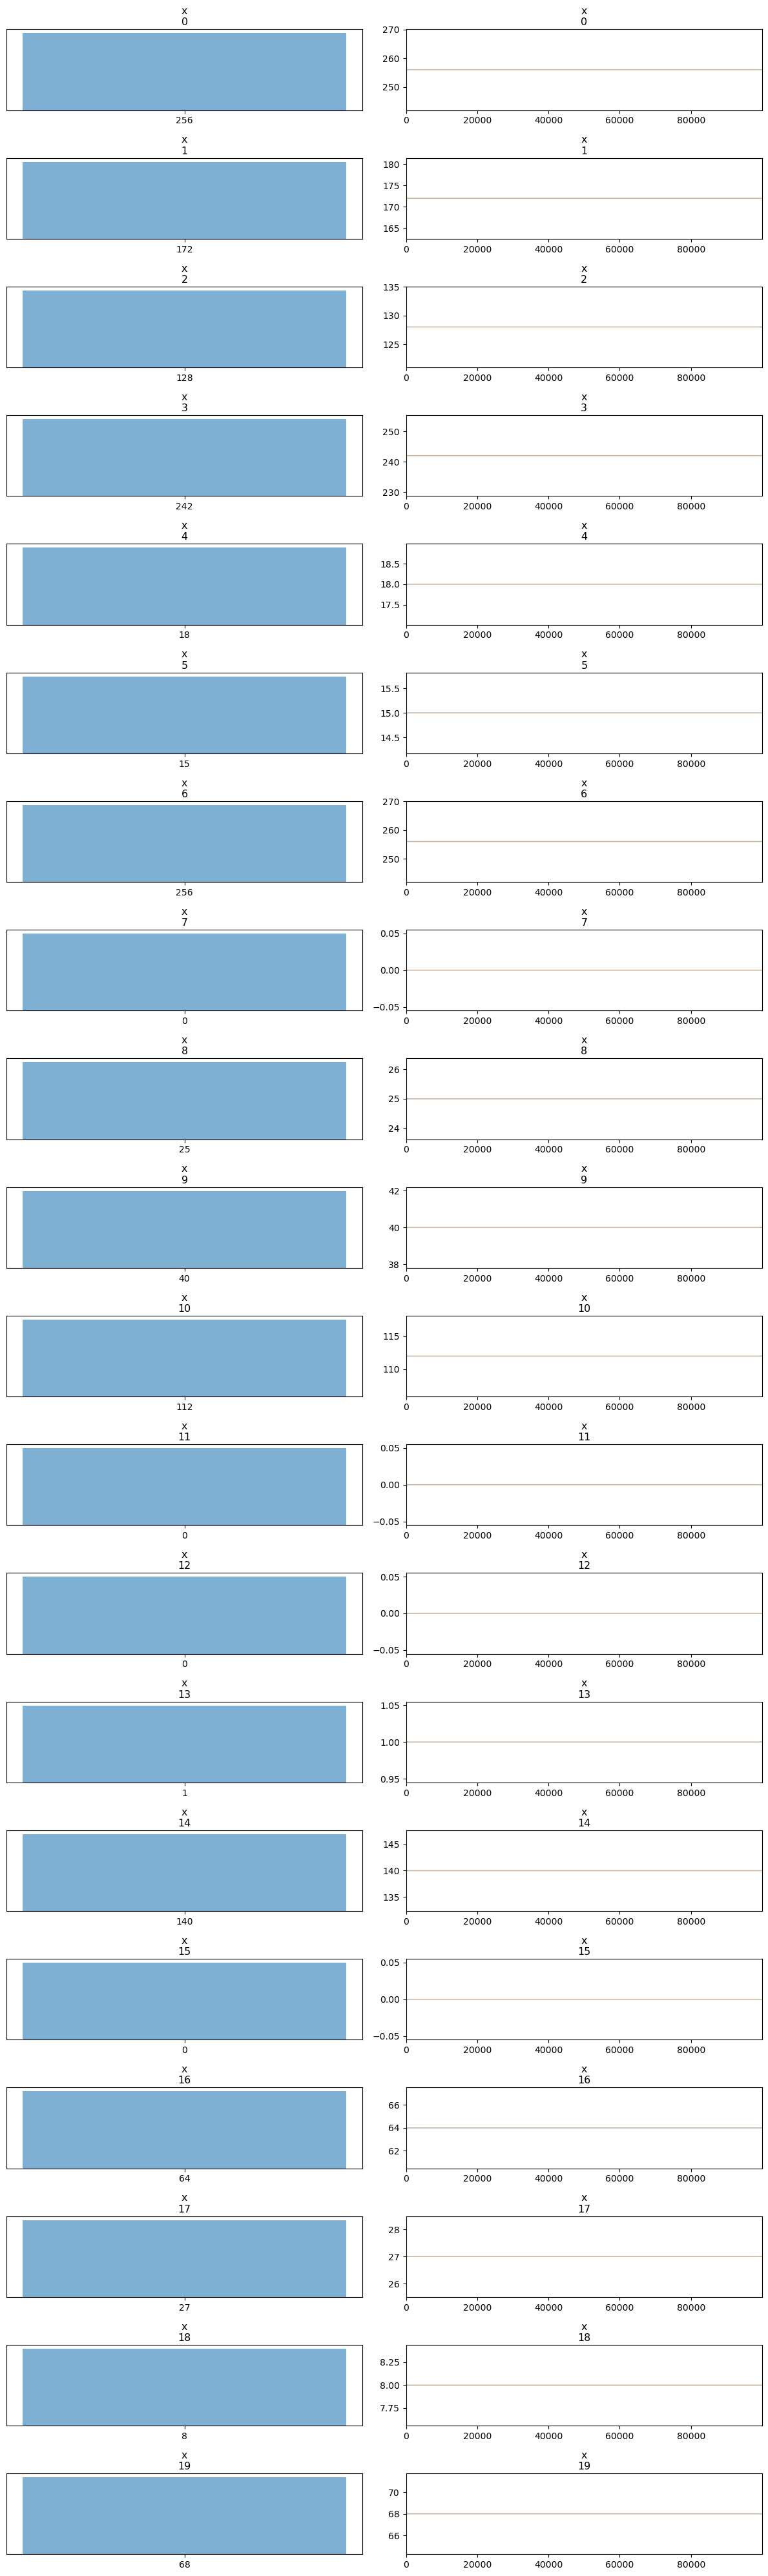

In [5]:
pm.plot_trace(trace, compact=False);

In [6]:
np.unique(trace.posterior['x'], axis=1)

array([[[256, 172, 128, 242,  18,  15, 256,   0,  25,  40, 112,   0,
           0,   1, 140,   0,  64,  27,   8,  68,  98, 116,  65,  63,
         256,   0, 256, 232]],

       [[256, 172, 128, 242,  18,  15, 256,   0,  25,  40, 112,   0,
           0,   1, 140,   0,  64,  27,   8,  68,  98, 116,  65,  63,
         256,   0, 256, 232]]])